# Get the number of images with boats

In [1]:
import pandas as pd

data_label = pd.read_csv('/tf/ship_data/train_ship_segmentations_v2.csv')

images_names = data_label['ImageId'].unique()
nb_images_total = len(images_names)

nb_images_bateau = nb_images_total - len(data_label[data_label.EncodedPixels != data_label.EncodedPixels])

print(
    "Nombre d'images : {}, dont {} comprenant au moins un bateau.".format(nb_images_total, nb_images_bateau)
)

Nombre d'images : 192556, dont 42556 comprenant au moins un bateau.


# Get informations concerning the sizes of boats on images

In [2]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('/tf/ship_data/train_ship_segmentations_OD.csv')

df_ship = df[df.xmax == df.xmax] # dataframe des images avec bateau

sizes = pd.DataFrame(columns = ['filename','W' , 'H'])

for index, row in tqdm(df_ship.iterrows(), total=df_ship.shape[0]):
    new_row = pd.DataFrame.from_dict({'filename': row['filename'], 'W': [row['xmax']-row['xmin']], 'H': [row['ymax']-row['ymin']]})
    sizes = pd.concat([sizes, new_row],  ignore_index=True)

100%|████████████████████████████████████| 81723/81723 [02:05<00:00, 653.20it/s]


In [5]:
print(sizes[['W','H']].astype(int).describe())

                  W             H
count  81723.000000  81723.000000
mean      51.497571     42.707255
std       57.055064     45.435486
min        0.000000      1.000000
25%       13.000000     13.000000
50%       28.000000     25.000000
75%       69.000000     56.000000
max      443.000000    335.000000


In [58]:
import matplotlib.pyplot as plt
import numpy as np

def draw_bar(sizes, nb_bar):
    
    bar_width = 768 // nb_bar
    counts_w = np.zeros(nb_bar)
    counts_h = np.zeros(nb_bar)
    
    for index, row in tqdm(sizes.iterrows(), total=sizes.shape[0]):
        counts_w[int(row['W']//bar_width)]+=1
        counts_h[int(row['H']//bar_width)]+=1
        
    x = np.linspace(bar_width/2,768+bar_width/2,nb_bar,endpoint=False)
    
    fig = plt.figure(figsize=(10, 7))
    plt.xticks(np.arange(0, 776, 25))
    plt.xticks(rotation=45)
    plt.xlabel('taille en pixels')
    plt.ylabel("Nombre de bateaux")
    plt.title('Distribution de la largeur des bateaux sur les images')
    plt.bar(x, counts_w, bar_width, color='#6495ed' )
    plt.savefig('size_distrib_w_'+str(nb_bar)+'.pdf')
    
    fig = plt.figure(figsize=(10, 7))
    plt.xticks(np.arange(0, 776, 25))
    plt.xticks(rotation=45)
    plt.xlabel('taille en pixels')
    plt.ylabel("nombre d'images")
    plt.title('Distribution de la hauteur des bateaux sur les images')
    plt.bar(x, counts_h, bar_width, color='#6495ed' )
    plt.savefig('size_distrib_h_'+str(nb_bar)+'.pdf')

100%|██████████████████████████████████| 81723/81723 [00:03<00:00, 22147.25it/s]


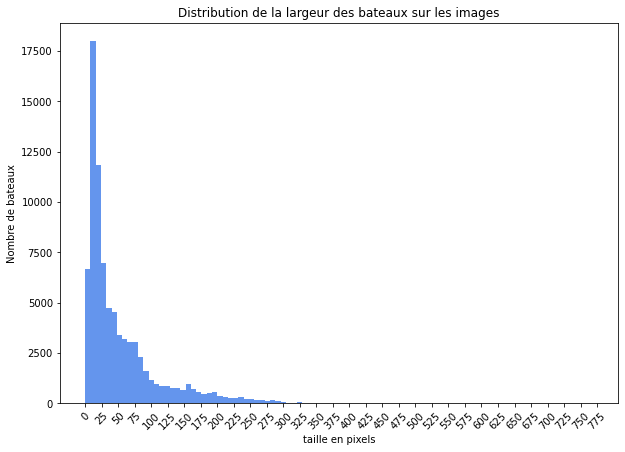

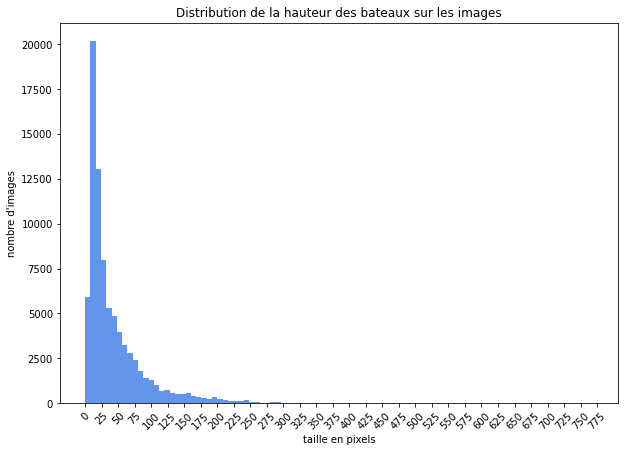

In [61]:
draw_bar(sizes, 96)